---
# <center> Credit Card Customer Segmentation </center>
### <center> using K Means Clustering </center> 
##### <div style="text-align: right">By Liam Davis</div>
---

In [2]:
import pandas as pd
import numpy as np
from K_Means_Clustering import K_Means_Clustering
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from scipy.spatial.distance import cdist

## Preprocessing Data

In [3]:
# read dataset
df = pd.read_csv("data/credit_card_customer_data.csv")

In [4]:
# show head
df.head()

,Unnamed: 0,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,0,1,87073,100000,2,1,1,0
1,1,2,38414,50000,3,0,10,9
2,2,3,17341,50000,7,1,3,4
3,3,4,40496,30000,5,1,1,4
4,4,5,47437,100000,6,0,12,3


In [5]:
# extract five rightmost columns
cols = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 
        'Total_visits_online', 'Total_calls_made']

subset = df[cols]

In [6]:
subset.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,34574.242424,4.706061,2.403030,2.606061,3.583333
std,37625.487804,2.167835,1.631813,2.935724,2.865317
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


In [7]:
# transform data
scaler=StandardScaler()
subset_scaled=scaler.fit_transform(subset)

# turn into dataframe
subset_scaled_df=pd.DataFrame(subset_scaled,columns=subset.columns)

# Data Visualizations

/home/liam/ENTER/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/liam/ENTER/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/liam/ENTER/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/liam/ENTER/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

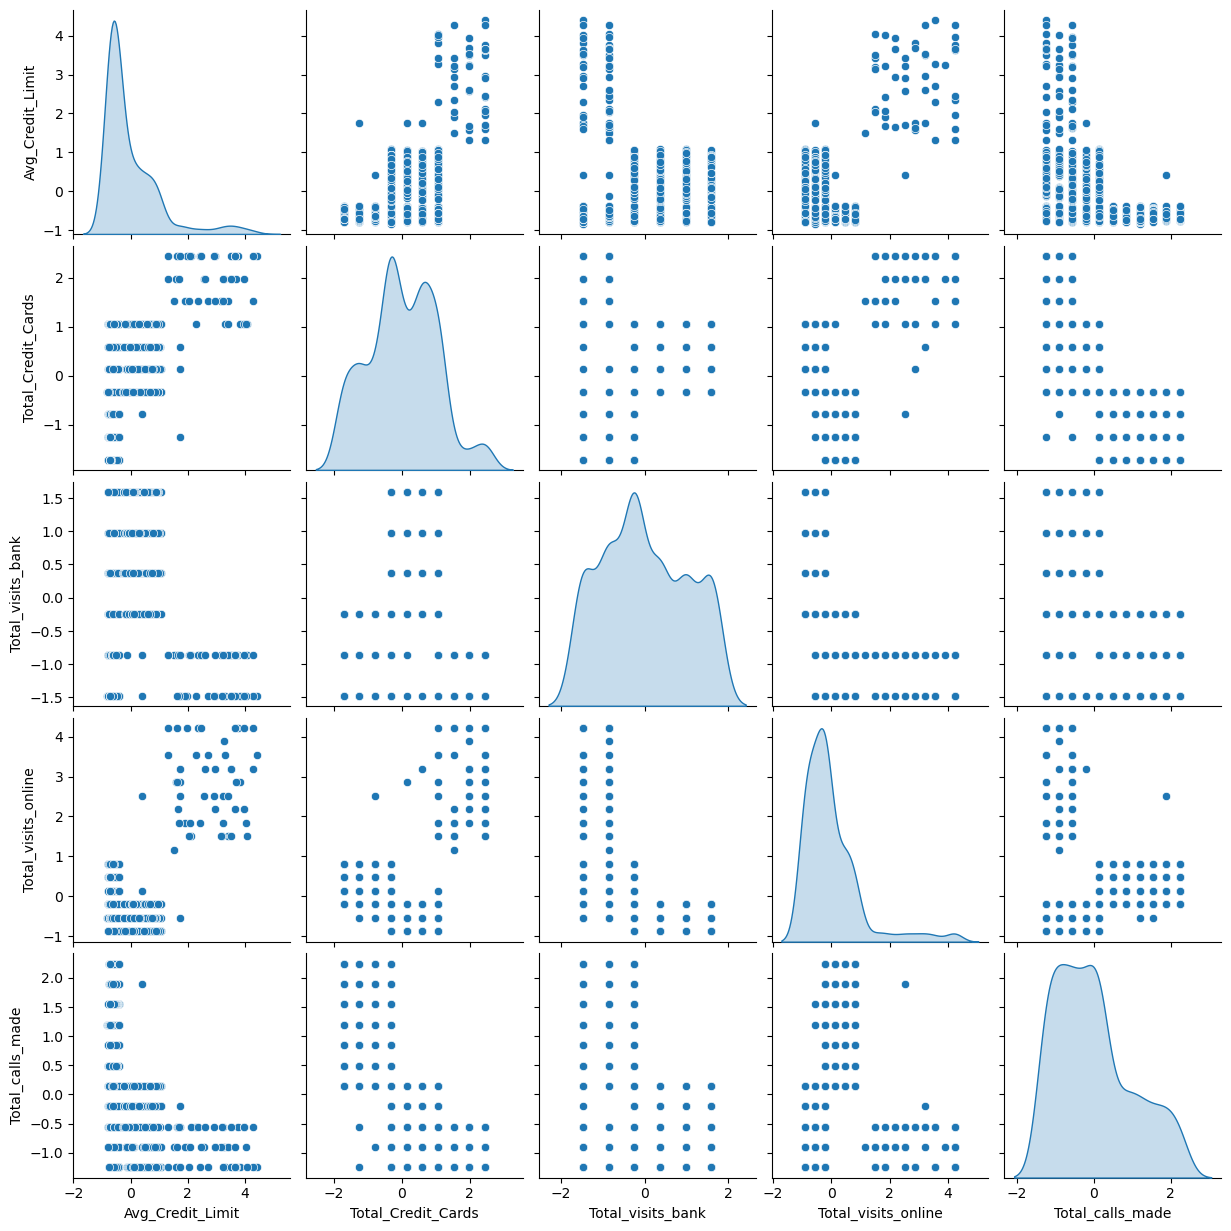

In [8]:
sns.pairplot(subset_scaled_df, diag_kind="kde")

<Axes: >

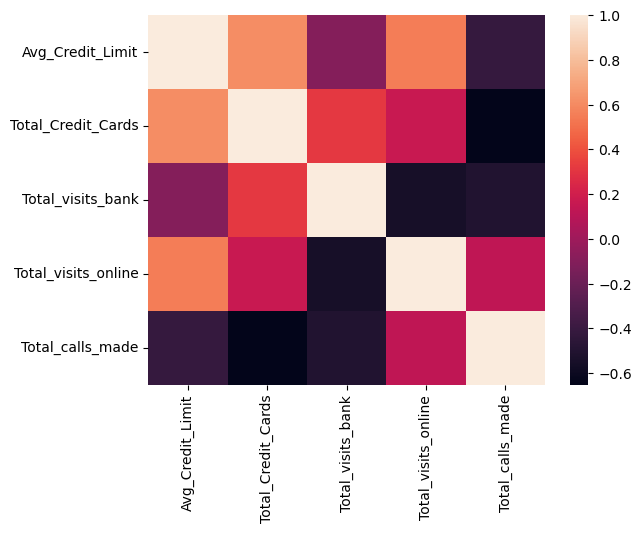

In [9]:
sns.heatmap(subset_scaled_df.corr())

# Clustering data with K Means Clustering

### Create elbow plot to determine clusters

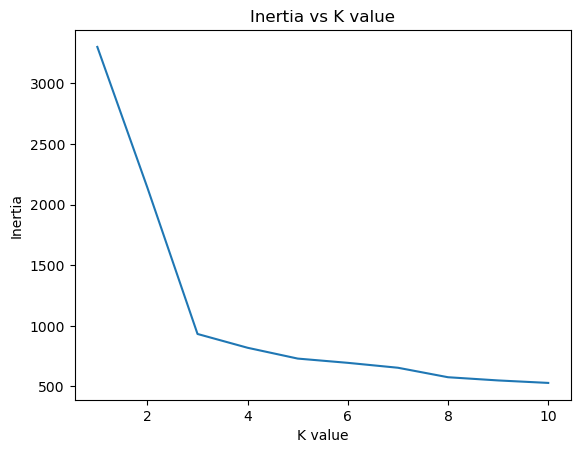

In [10]:
# Create an empty list to store the inertia values
inertias = []

# Define the range of K values to try
k_values = range(1, 11)  # trying K from 1 to 10

# Iterate over each K value
for k in k_values:
    # Initialize and fit the KMeans model
    kmeans = K_Means_Clustering(n_clusters=k)
    kmeans.fit(subset_scaled)
    
    # Calculate inertia (sum of squared distances) for the current K
    inertia = 0
    for i in range(k):
        cluster_points = subset_scaled[kmeans.assign_clusters(subset_scaled) == i]
        centroid = kmeans.centroids[i]
        inertia += np.sum((cluster_points - centroid) ** 2)

    inertias.append(inertia)

# Plotting the elbow plot
fig, ax = plt.subplots()

# Plot k_values on the x axis and inertias on the y axis as a line graph
ax.plot(k_values, inertias)

# Set the title, x label, and y label of the graph
ax.set_title('Inertia vs K value')
ax.set_xlabel('K value')
ax.set_ylabel('Inertia')

# Show the graph
plt.show()

### The elbow plot "bends" at 3 clusters, so we will use 3 clusters.

In [11]:
# run K Means Clustering
kmeans = K_Means_Clustering(n_clusters=3)
kmeans.fit(subset_scaled)

In [12]:
# print centroids
centroids = kmeans.centroids
centroids = pd.DataFrame(centroids)

print(centroids)

          0         1         2         3         4
0 -0.595796 -1.059623 -0.901518  0.322997  1.148109
1 -0.021062  0.373690  0.666395 -0.553672 -0.553005
2  2.831764  1.862226 -1.105763  2.827319 -0.874330


In [14]:
# Assign clusters to dataset
labels = kmeans.assign_clusters(subset_scaled)

# Add the cluster labels to the original scaled dataframe
subset_scaled_df['Cluster'] = labels

# Cluster Visualizations
##### Clusters are in 5D, but we can only visualize in 2D. We will visualize total credit cards, total bank visits, total online visits and total calls made against average credit limit.

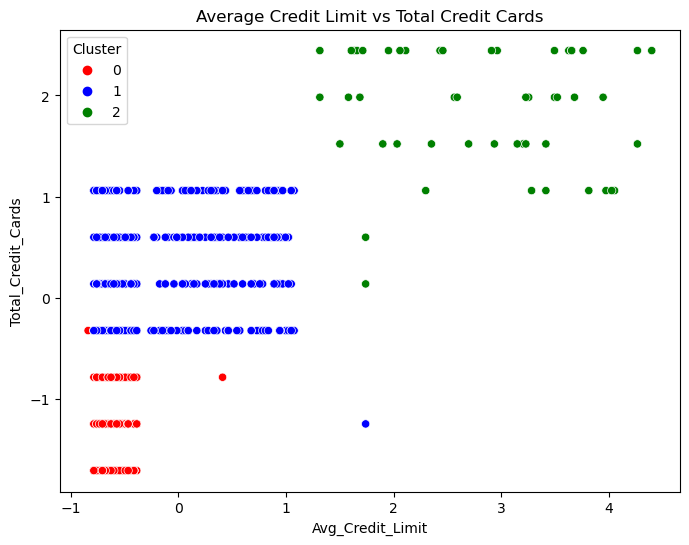

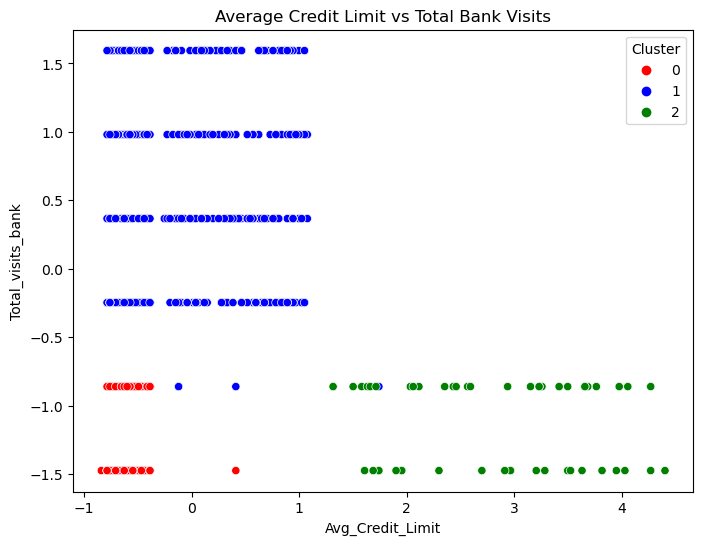

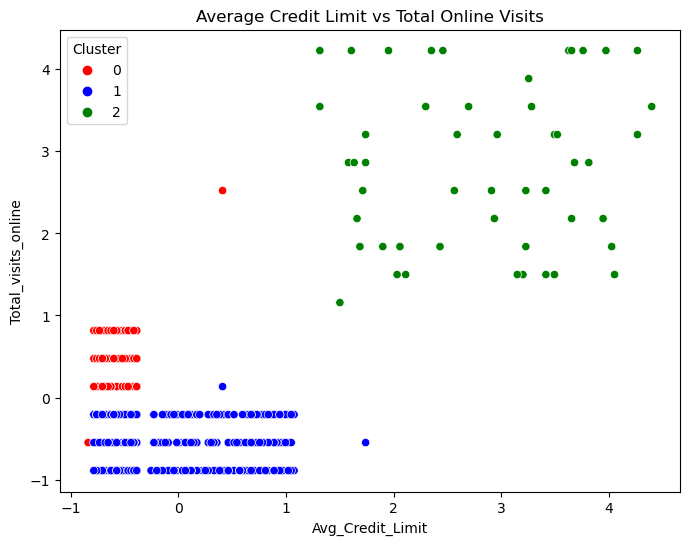

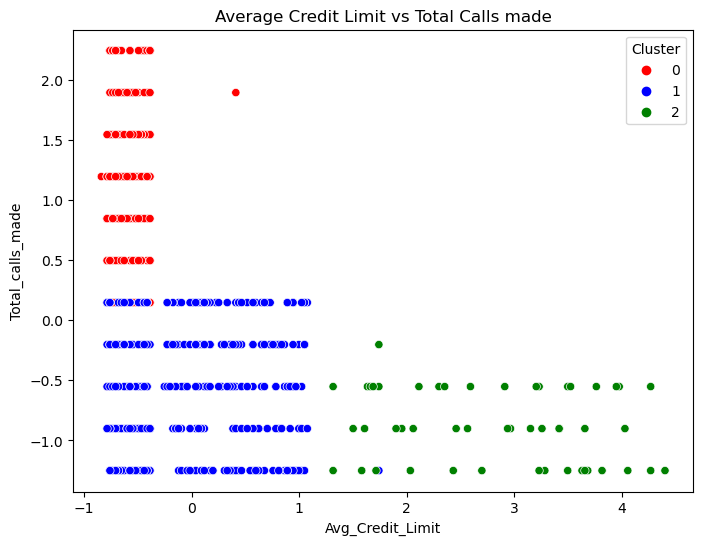

In [33]:
# total credit cards
plt.figure(figsize=(8,6))
sns.scatterplot(x='Avg_Credit_Limit', y='Total_Credit_Cards', hue='Cluster', data=subset_scaled_df, palette=['red','blue','green'])
plt.title('Average Credit Limit vs Total Credit Cards')
plt.show()

# total bank visits
plt.figure(figsize=(8,6))
sns.scatterplot(x='Avg_Credit_Limit', y='Total_visits_bank', hue='Cluster', data=subset_scaled_df, palette=['red','blue','green'])
plt.title('Average Credit Limit vs Total Bank Visits')
plt.show()

# total online visits
plt.figure(figsize=(8,6))
sns.scatterplot(x='Avg_Credit_Limit', y='Total_visits_online', hue='Cluster', data=subset_scaled_df, palette=['red','blue','green'])
plt.title('Average Credit Limit vs Total Online Visits')
plt.show()

# total calls
plt.figure(figsize=(8,6))
sns.scatterplot(x='Avg_Credit_Limit', y='Total_calls_made', hue='Cluster', data=subset_scaled_df, palette=['red','blue','green'])
plt.title('Average Credit Limit vs Total Calls made')
plt.show()

## Cluster Box Plots

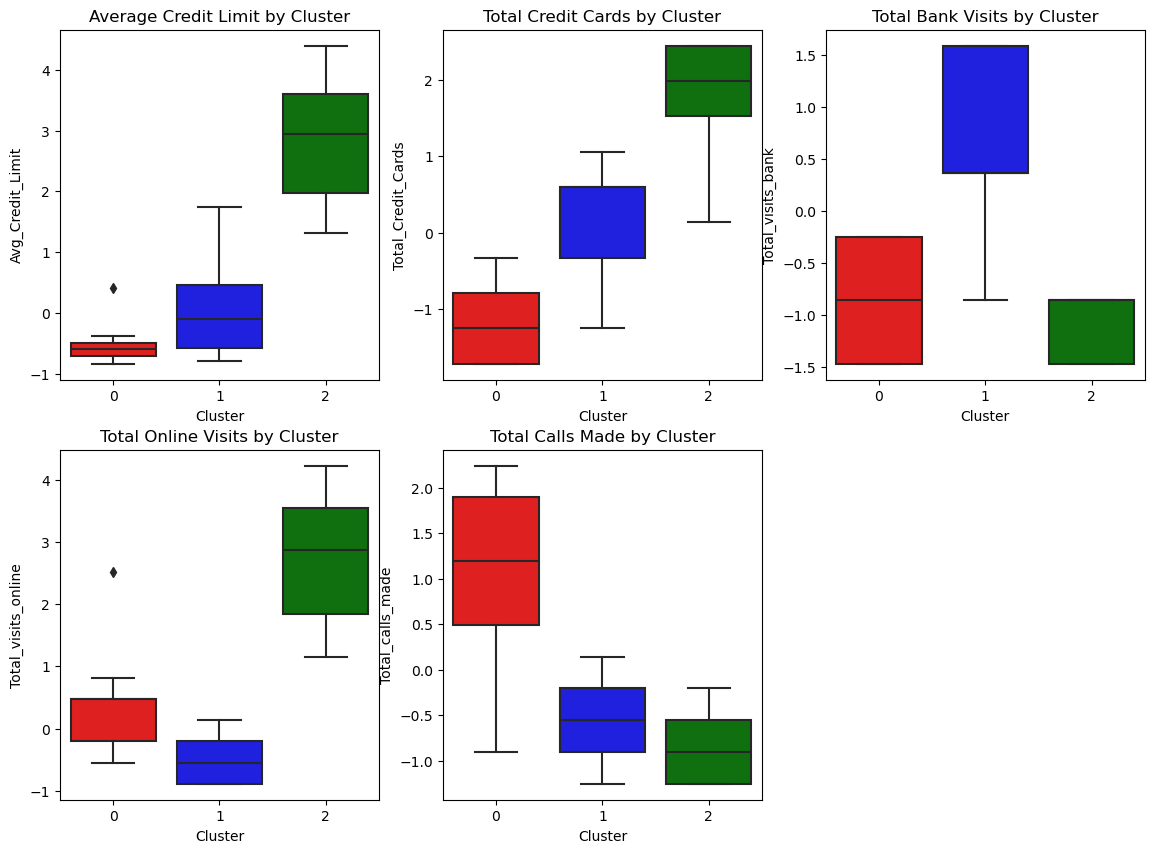

In [30]:
# create box plots for each cluster
plt.figure(figsize=(14,10))

# average credit limit box plot
plt.subplot(2, 3, 1)
sns.boxplot(x='Cluster', y='Avg_Credit_Limit', data=subset_scaled_df, palette=['red','blue','green'])
plt.title('Average Credit Limit by Cluster')

# total credit limit box plot
plt.subplot(2, 3, 2)
sns.boxplot(x='Cluster', y='Total_Credit_Cards', data=subset_scaled_df, palette=['red','blue','green'])
plt.title('Total Credit Cards by Cluster')

# total bank visits box plot
plt.subplot(2, 3, 3)
sns.boxplot(x='Cluster', y='Total_visits_bank', data=subset_scaled_df, palette=['red','blue','green'])
plt.title('Total Bank Visits by Cluster')

# total online visits box plot
plt.subplot(2, 3, 4)
sns.boxplot(x='Cluster', y='Total_visits_online', data=subset_scaled_df, palette=['red','blue','green'])
plt.title('Total Online Visits by Cluster')

# total calls made box plot
plt.subplot(2, 3, 5)
sns.boxplot(x='Cluster', y='Total_calls_made', data=subset_scaled_df, palette=['red','blue','green'])
plt.title('Total Calls Made by Cluster')

# Show the plots
plt.show()

# Cluster Analysis
**1. Cluster Red - Low Credit/Credit Issues:**


These customers have a low average credit limit and fewer credit cards. They make calls to the bank but rarely make in-person or online visits. They likely have little to no credit history or are actively dealing with credit issues.

**2. Cluster Blue - Typical Customers:**

These customers have a moderate credit limit and number of credit cards, make a lot of in-person visits but little online visits or calls. They likely have a reasonably established credit history and are able to largely manage their finances comfortably, but seek personalized attention through in-person visits when dealing with their finances.

**3. Cluster Green - Well Off:**

These customers have a high credit limit and number of credit cards, and mostly visit online. They likely have built up significant credit and manage multiple accounts. Because they are well off, they likely prefer the convenience of online visits over phone calls or in-person visits.